## MLDDS Practice Assessment Solution

### Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Tasks
1. Train classification models to predict whether a given breast cancer sample is malignant (M) or benign (B). [20 points]
  - Use data from training_data.csv for training.

2. Determine which model you selected performs the best: [20 points]
  - use classification_report
  - use confusion_matrix
  - state which model is the best performing one and why

3. Demonstrate how you will use the model in deployment [10 points]
  - Use data from prediction_data.csv
  - Get a prediction from your best model, print out the prediction (malignant or benign).

### Passing Requirements
- To pass the assessment, you should compare at least 2 types of models (there is no upper limit).
    - The model performance doesn't have to be the best possible, as long as you demonstrate how you compared them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('training_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 32 columns):
id                         565 non-null int64
diagnosis                  565 non-null object
radius_mean                563 non-null float64
texture_mean               565 non-null float64
perimeter_mean             565 non-null float64
area_mean                  565 non-null float64
smoothness_mean            565 non-null float64
compactness_mean           565 non-null float64
concavity_mean             562 non-null float64
concave points_mean        565 non-null float64
symmetry_mean              565 non-null float64
fractal_dimension_mean     565 non-null float64
radius_se                  565 non-null float64
texture_se                 565 non-null float64
perimeter_se               565 non-null float64
area_se                    565 non-null float64
smoothness_se              565 non-null float64
compactness_se             565 non-null float64
concavity_se               565 non

### Clean

In [2]:
# drop NA values, since there are not many

df.dropna(inplace=True)

### Label Encode

In [3]:
# check unique values before we encode
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
le.classes_ # shows that B is 0, M is 1

array(['B', 'M'], dtype=object)

### Visualize

#### Scatter matrix

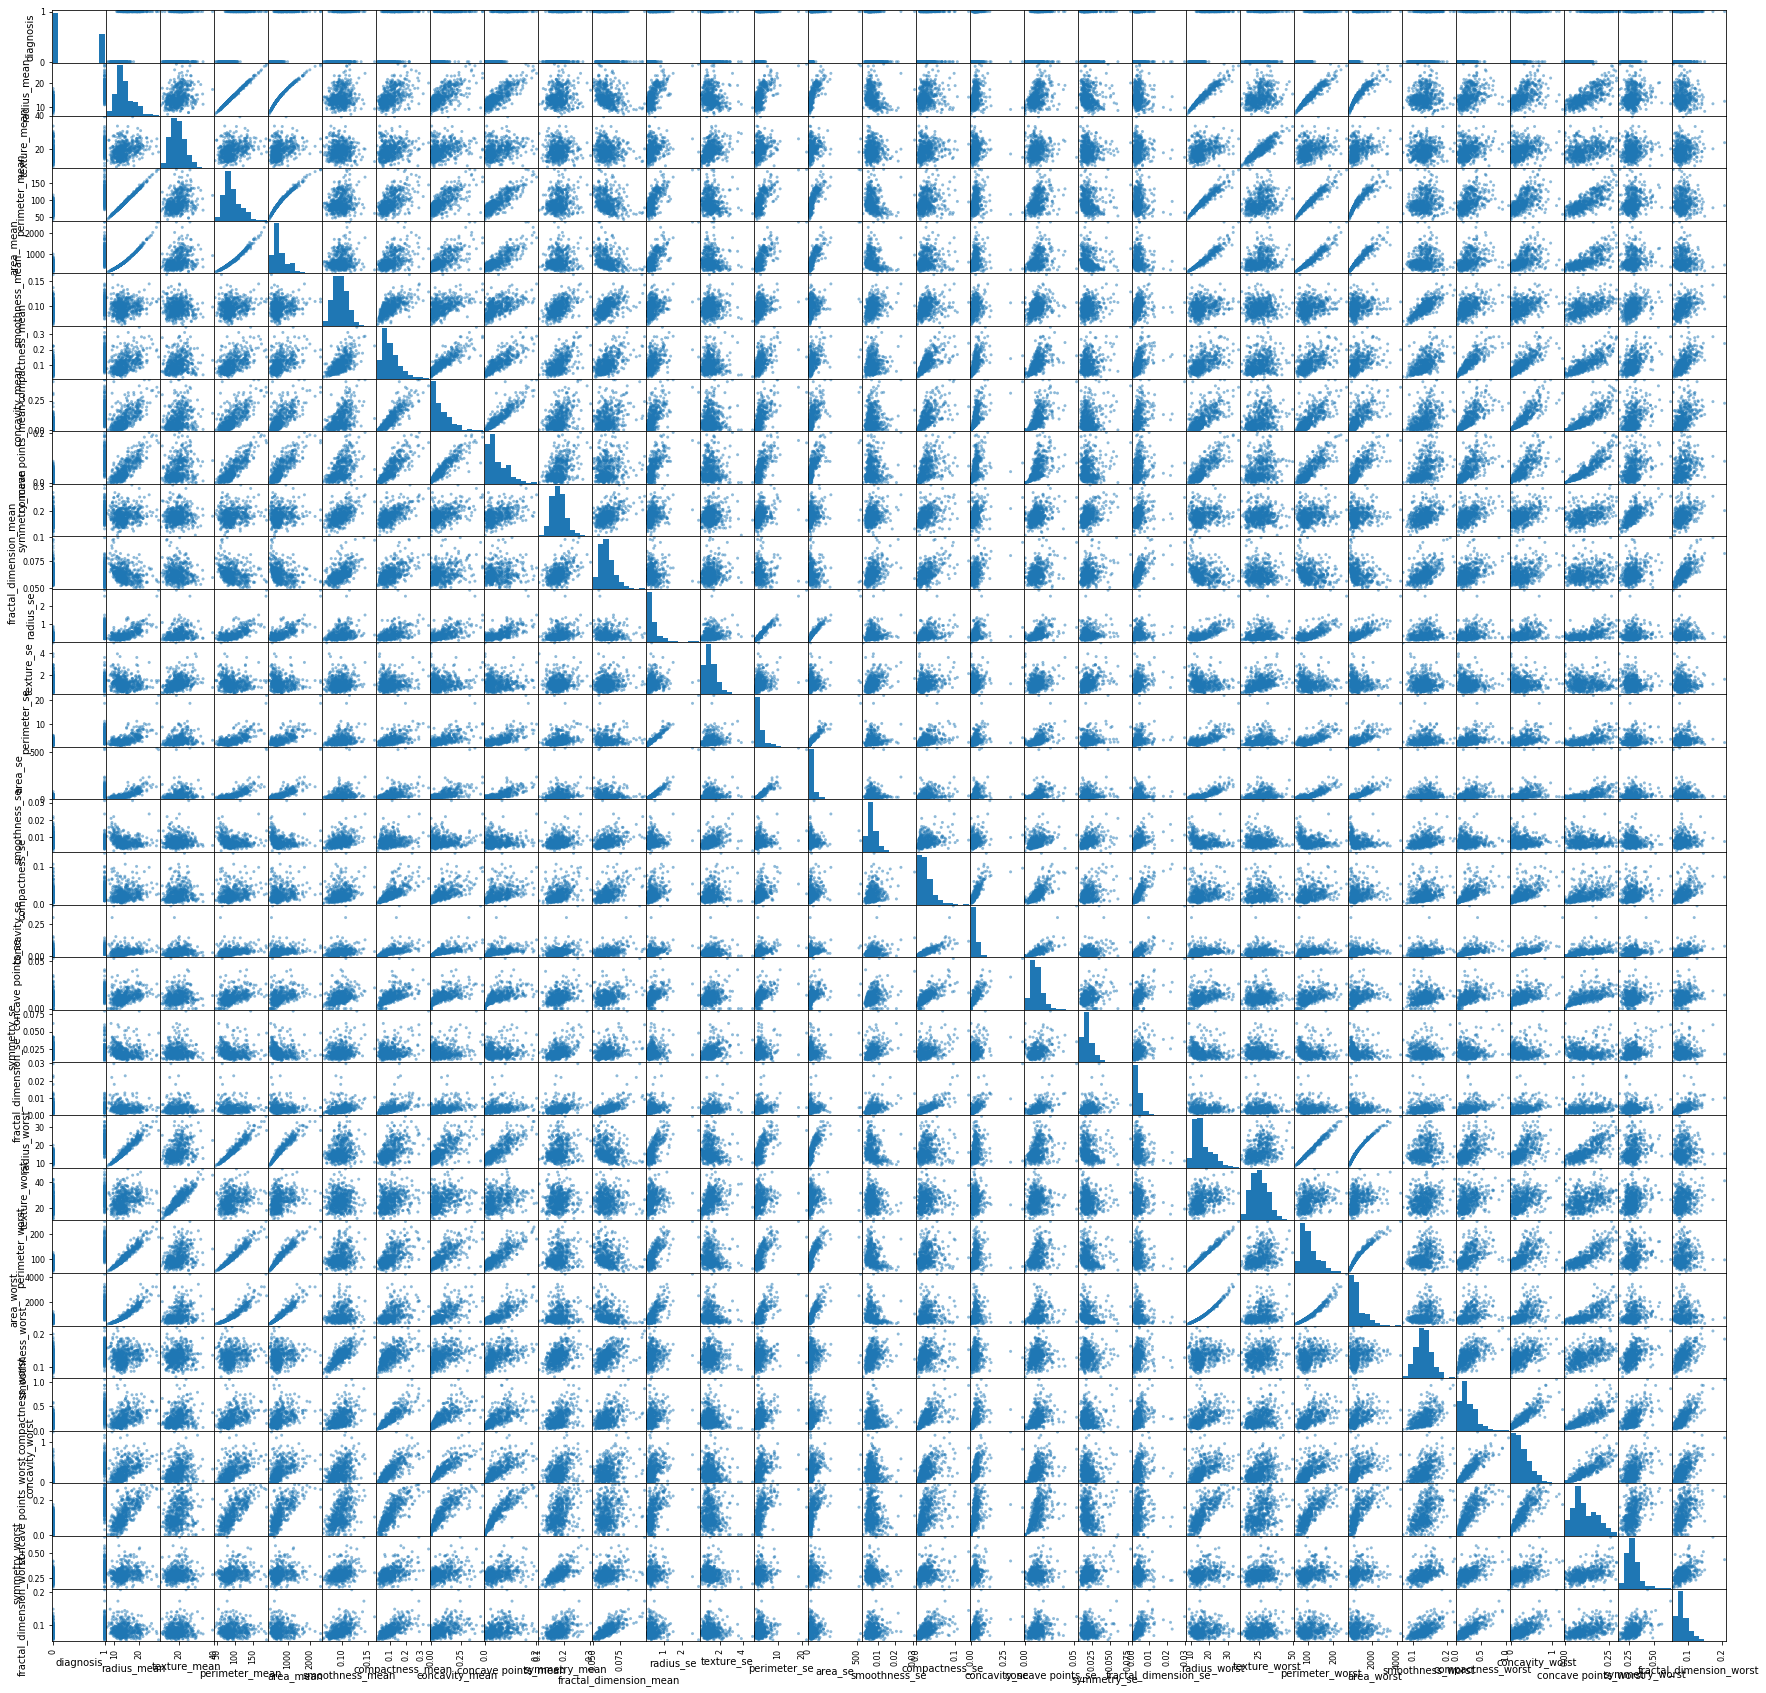

In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# skip some columns that don't have meaningful distributions (e.g. id)
df_scatter = df.loc[:, df.columns != 'id']

scatter_matrix(df_scatter, figsize=(30, 30))
plt.show()

#### Heatmap of correlations 

NOT REQUIRED for full grade but useful when scatter matrix is huge

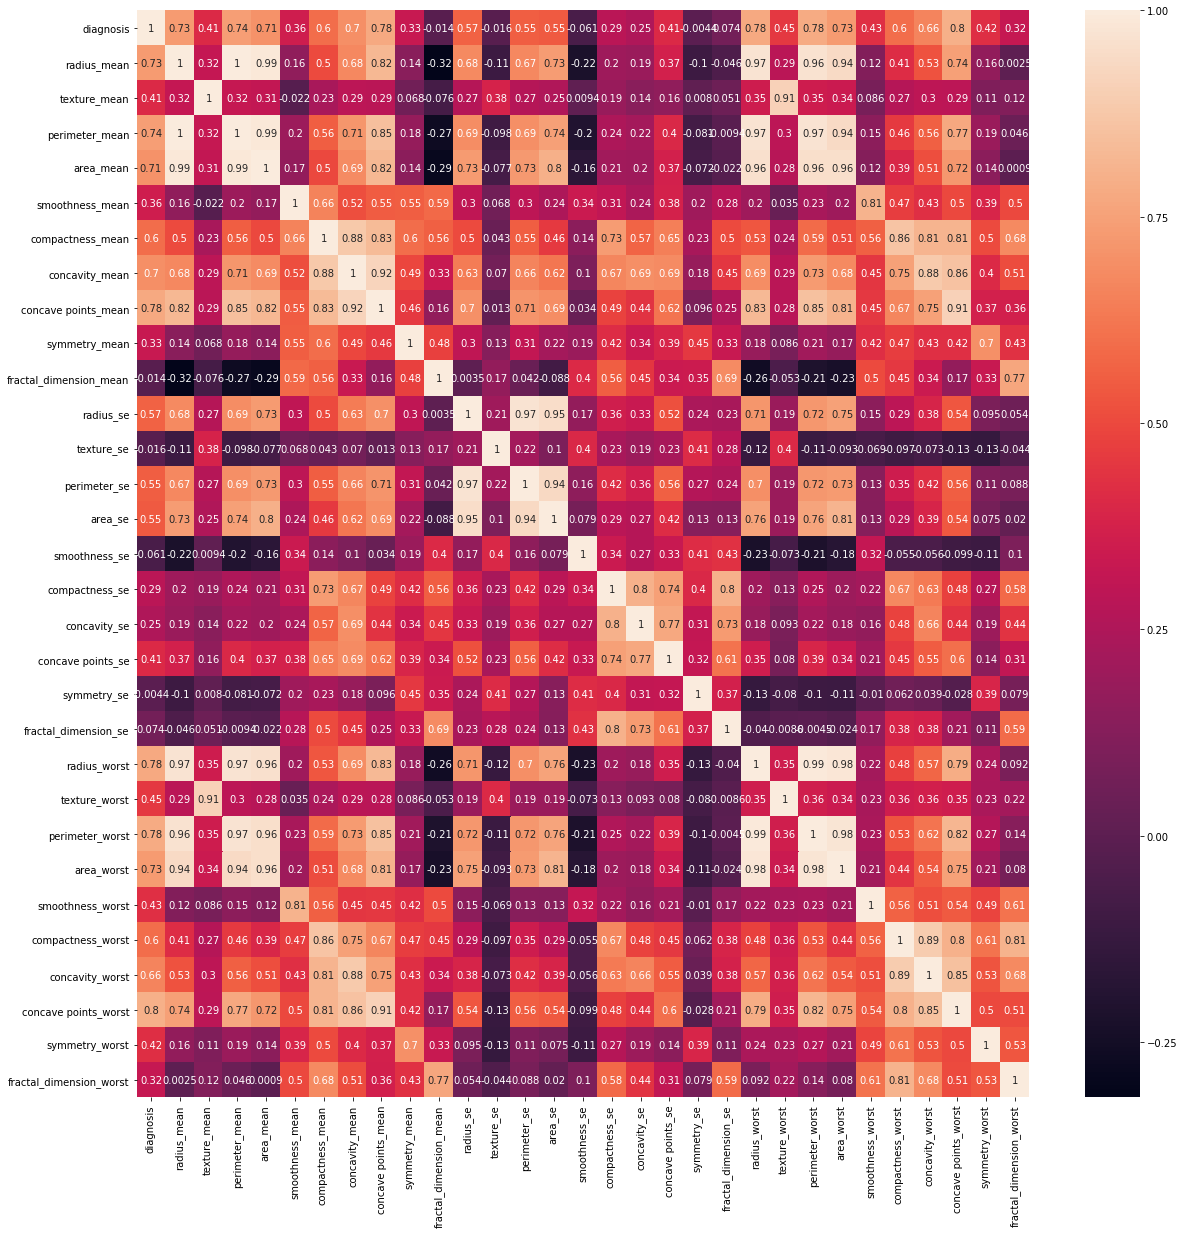

In [7]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))
corr = df_scatter.corr()
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

#### PCA visualization

In [8]:
X = df.loc[:, 'radius_mean':'fractal_dimension_worst']
y = df.diagnosis

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_scaled_2d = pca.fit_transform(X_scaled)

print(sum(pca.explained_variance_ratio_)) # check how lossy 2-D PCA will be

0.6310981862008943


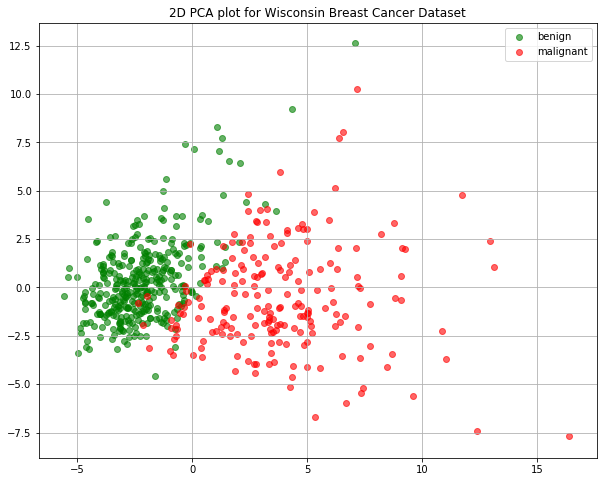

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(X_scaled_2d[y==0, 0], X_scaled_2d[y==0, 1], color='g', label='benign', alpha=.6)
ax.scatter(X_scaled_2d[y==1, 0], X_scaled_2d[y==1, 1], color='r', label='malignant', alpha=.6)

ax.set(title='2D PCA plot for Wisconsin Breast Cancer Dataset')
ax.grid()
ax.legend()
plt.show()

## Train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit + Metrics

The decision boundary is fairly linear, so SGDClassifier, SVM should be able to easily find that boundary.

Accuracy 0.9785714285714285
             precision    recall  f1-score   support

          0       0.98      0.99      0.98        86
          1       0.98      0.96      0.97        54

avg / total       0.98      0.98      0.98       140



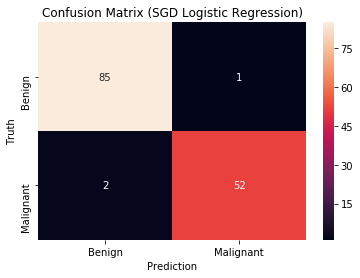

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

sgd = SGDClassifier(random_state=42, tol=1e-3, max_iter=100)
sgd.fit(X_train_scaled, y_train)

print('Accuracy', sgd.score(X_test_scaled, y_test))
      
y_pred = sgd.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (SGD Logistic Regression)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

Accuracy 0.9857142857142858
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        86
          1       1.00      0.96      0.98        54

avg / total       0.99      0.99      0.99       140



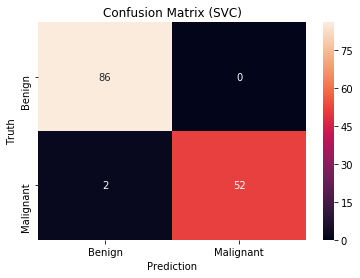

In [13]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
print('Accuracy', svc.score(X_test_scaled, y_test))
      
y_pred = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax)
ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (SVC)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

## Best performing model

- SVC has higher accuracy
- A better measure is the F1 score because it is less sensitive to class imbalance
- Based on the F1-score for both classes, SVC performs better than SGD Logistic Regression.

## SVC + GridSearchCV

Accuracy 0.9785714285714285
{'C': 10, 'gamma': 0.01}
             precision    recall  f1-score   support

          0       0.97      1.00      0.98        86
          1       1.00      0.94      0.97        54

avg / total       0.98      0.98      0.98       140



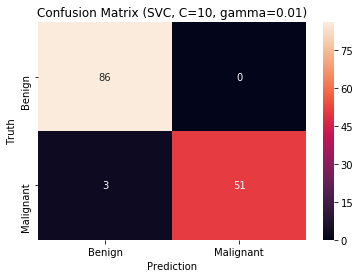

In [14]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10] 
param_grid = {'C': Cs, 'gamma' : gammas}

grid_search = GridSearchCV(SVC(random_state=42), param_grid)
grid_search.fit(X_train_scaled, y_train)
print('Accuracy', grid_search.score(X_test_scaled, y_test))

y_pred = grid_search.predict(X_test_scaled)

print(grid_search.best_params_)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (SVC, C=10, gamma=0.01)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])
plt.show()

- Not much improvement from Grid Search
- The result is lower (compared to non-grid search) because we are using 3-fold cross validation during grid search. For non-grid search training, the whole training set was used.

## Prediction

In [15]:
df_test_samples = pd.read_csv('prediction_data.csv')

# select features
X_samples = df_test_samples.loc[:, 'radius_mean':'fractal_dimension_worst']

# scale features
X_samples_scaled = X_scaler.transform(X_samples)

# predict
result_encoded = grid_search.best_estimator_.predict(X_samples_scaled)

# inverse transform
result = le.inverse_transform(result_encoded)

# print truth vs. result
y_samples = df_test_samples.diagnosis
for truth, pred in zip(y_samples, result):
    print('truth', truth, 'prediction', pred)

truth M prediction M
truth M prediction M
truth M prediction M
truth B prediction B


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
# This is a known bug in sklearn:

# /anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: 
# The truth value of an empty array is ambiguous. Returning False, but in future this will result in an 
# error. Use `array.size > 0` to check that an array is not empty.